# Assignment 4  

## Section 2: Recurrent Neural Network

This section of the assignment is the easiest in all questions of the assignments.  This is intentional -- you should gain quick experience with the RNN (and how slow they are to train) in order to guide your final project choice and allow you to start into your final project ASAP.

This section is simply about using RNNs to train classifiers.  Encoder-decoder RNN models will be explored in a different lab (for the auto-correct example), but they are far slower to train than the RNNs used in this assignment (which are standard RNNs, not the encoder-decoder models).

Your basic choices in RNNs are the following:

    1. For text: word embedding (typically word2vec or GloVe, but you can also train them yourself!)
    2. Number of latent layers (stacked layers)
    3. Dimensions of latent layers
    4. Whether the latent layers are bidirectional or unidirectional
    5. Type of latent layer transition (linear, linear with sigmoid, LSTM, GRU, ...)
    6. Choice of optimizer, batch size, learning rates and other parameters for some optimizers
    7. Many more complex choices for latent layer that typically require modifying the Tensorflow model directly (not covered here)

## Data
You'll need to download and uncompress the following:

1. 20 newsgroups 
    1. [20 newsgroups](http://qwone.com/~jason/20Newsgroups/) **(16.5Mb)**
    2. Note: you can upload this data straight to Colab.
    
2. GloVe word embeddings -- better than word2vec 
    1. [GloVE 6B](https://nlp.stanford.edu/projects/glove/) **(822Mb)**
    2. Note: Note: you can upload this data straight to Colab.

3. US Consumer Finance Complaints 
    1. [Kaggle Competition](https://www.kaggle.com/cfpb/us-consumer-finance-complaints/data) **(90.4Mb)**
    2. Note: you should download this file and put the consumer_complaints.csv file in the same directory as this notebook

## Uploading the data

1. Newspaper data

In [1]:
!wget http://qwone.com/~jason/20Newsgroups/20news-19997.tar.gz

--2020-03-23 03:24:01--  http://qwone.com/~jason/20Newsgroups/20news-19997.tar.gz
Resolving qwone.com (qwone.com)... 108.20.201.166
Connecting to qwone.com (qwone.com)|108.20.201.166|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17332201 (17M) [application/x-gzip]
Saving to: ‘20news-19997.tar.gz.2’

20news-19997.tar.gz 100%[===================>]  16.53M  5.85MB/s    in 2.8s    

2020-03-23 03:24:04 (5.85 MB/s) - ‘20news-19997.tar.gz.2’ saved [17332201/17332201]



In [0]:
#now you have the compressed data uploaded to your Colab, unzip it using the following command line:
import tarfile
tar = tarfile.open("20news-19997.tar.gz")
tar.extractall()
tar.close()

In [0]:
# Change these paths accordingly if you have uploaded the data in another path
newspaper_PATH = "20_newsgroups"

2. GloVE Embedding

In [4]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-03-23 03:24:15--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-23 03:24:15--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-23 03:24:16--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [0]:
import zipfile
zip_ref = zipfile.ZipFile("glove.6B.zip", 'r')
zip_ref.extractall("glove_6B")
zip_ref.close()

In [0]:
GLOVE_DIR = "glove_6B/"

3. Consumer Finance complaint

Since kaggle requires user/pass to download a file. It is easier to just download to your local drive and upload the csv file in Colab.

In [0]:
consumer_PATH = "consumer_complaints.csv"

## Objective

You have two assignment tasks for this section:

**RNN.Q1.** Increase the epochs of the 20 newsgroups examples to at least 20 epochs and run this notebook overnight to get results... you can save the results in a different notebook and commit to your assignment repository (we simply want to verify that you ran this notebook for at least 20 epochs).  Directly below this question, answer (a) which architecture worked best and why you hypothesize that is the case, and (b) do the same for the worst performing architecture.
    
**RNN.Q2.** Run the above architectures for the financial data (note that this data is typically much shorter in length).  Try out at least two different architectures (not just optimizer settings, etc.) to see if you can improve the results.  Directly below this question, (a) describe the two architectures you proposed and why you think they might improve results, (b) answer which architecture worked best (reference a graph) and why you hypothesize this is the case, and (c) do the same for the worst performing architecture.


## Submission:
 You can commit different notebooks for each question, just label them and include RNN- Q1 or RNN-Q2 in the filename. For the submission, you only need to train your RNN structures by using a truncated backprop for both RNN-Q1 and RNN-Q2.

# Contents of Notebook
### Part A. 20 Newsgroups

    1. Text Data Preprocessing for 20 news groups
    2. Linear Classifiers (MultinomialNB with TF-IDF feature selection,
     Logistic Regression) 
    3. Pure CNN based text classifier with pretrained word embedding
    4. LSTM based RNN text classifier with pretrained word embedding
    5. Stacked and Bidirectional LSTM RNN examples
    6. LSTM based RNN text classifier with pretrained word embedding  trained via Truncated BPTT (TBPTT)

### Part B. Consumer Finance Complaints

    1. Text Data Proprocessing for complaint data

# Part A. 20 Newsgroups

__Reference for some of the following code of this part:__
[Using pre-trained word embeddings in a Keras model](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html)

**NOTE**: The claim on the above blog about 95% accuracy on 20 newsgroups is incorrect -- the blog included the email header which contains the target label in the features!  **The true accuracy of the model with the header removed is 71%.**

In [0]:
class_names = ['alt.atheism',
                 'comp.graphics',
                 'comp.os.ms-windows.misc',
                 'comp.sys.ibm.pc.hardware',
                 'comp.sys.mac.hardware',
                 'comp.windows.x',
                 'misc.forsale',
                 'rec.autos',
                 'rec.motorcycles',
                 'rec.sport.baseball',
                 'rec.sport.hockey',
                 'sci.crypt',
                 'sci.electronics',
                 'sci.med',
                 'sci.space',
                 'soc.religion.christian',
                 'talk.politics.guns',
                 'talk.politics.mideast',
                 'talk.politics.misc',
                 'talk.religion.misc']

In [0]:
def print_confusion_matrix(confusion_matrix, class_names, 
                           figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Basic Packages

In [10]:
from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import numpy as np
import tensorflow as tf
import pandas as pd
import pickle
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.utils import to_categorical

## Constants

In [0]:
TEXT_DATA_DIR = newspaper_PATH
MAX_SEQUENCE_LENGTH = 2500
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.4

## Text Data Processing

In [0]:
def get_data(data_path):
    texts = []  # list of text samples
    labels_index = {}  # dictionary mapping label name to numeric id
    labels = []  # list of label ids
    for name in sorted(os.listdir(data_path)):
        path = os.path.join(data_path, name)
        if os.path.isdir(path):
            label_id = len(labels_index)
            labels_index[name] = label_id
            for fname in sorted(os.listdir(path)):
                if fname.isdigit():
                    fpath = os.path.join(path, fname)
                    args = {} if sys.version_info < (3,) else {'encoding': 'latin-1'}
                    with open(fpath, **args) as f:
                        t = f.read()
                        i = t.find('\n\n')  # Skip header which contains label!!!
                        if 0 < i:
                            t = t[i:]
                        texts.append(t)
                    labels.append(label_id)
    return texts, labels_index, labels

In [0]:
texts, labels_index, labels = get_data(TEXT_DATA_DIR)

In [0]:
indices = np.arange(len(texts))
np.random.shuffle(indices)
num_validation_samples = int(VALIDATION_SPLIT * len(texts))

In [0]:
def data_preprocessing(texts, labels, indices, num_validation_samples, classifier="NeuralNetwork"):
    
    word_index = None
    
    if classifier == "NeuralNetwork":
        tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
        tokenizer.fit_on_texts(texts)
        sequences = tokenizer.texts_to_sequences(texts)
        
        plt.figure()
        plt.hist([len(x) for x in sequences])
        plt.xlabel('Length of Document')
        plt.ylabel('Number of Documents')
        plt.title('Statistic of Data')
        plt.grid(True)
        plt.show()
        
        word_index = tokenizer.word_index
        
        with open('tokenizer.pickle', 'wb') as handle:
            pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
        data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
        
    else:
        vectorizer = TfidfVectorizer()
        data = vectorizer.fit_transform(texts)
    
    labels = to_categorical(np.asarray(labels))  
    data = data[indices]
    labels = labels[indices]

    x_train = data[:-num_validation_samples]
    y_train = labels[:-num_validation_samples]
    x_val = data[-num_validation_samples:]
    y_val = labels[-num_validation_samples:]
    
    return x_train, y_train, x_val, y_val, word_index        

In [0]:
experiment_result = dict()

## SKLEARN

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [0]:
x_train, y_train, x_val, y_val, _ = data_preprocessing(texts, 
                                                       labels, 
                                                       indices, 
                                                       num_validation_samples, 
                                                       classifier="SKLEARN")

In [0]:
clf =  MultinomialNB(alpha=0.1)
clf.fit(x_train, np.argmax(y_train, axis=1))
pred = clf.predict(x_val)
experiment_result['NB'] = metrics.accuracy_score(np.argmax(y_val, axis=1), pred)

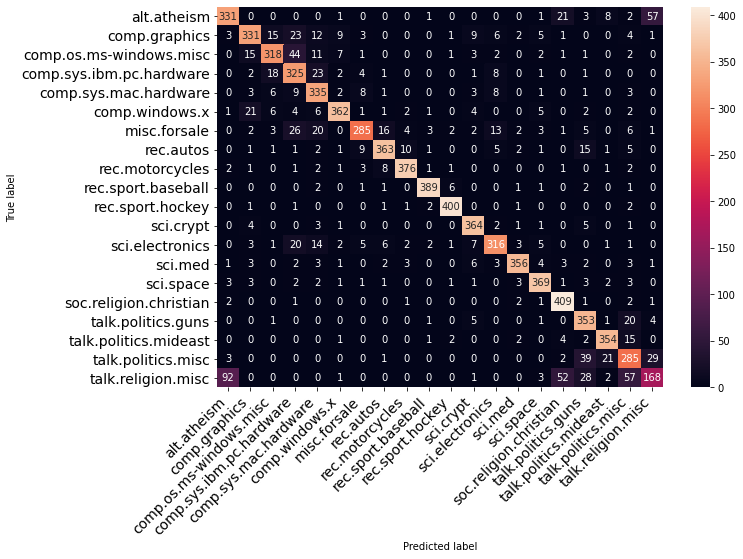

In [20]:
print_confusion_matrix(metrics.confusion_matrix(np.argmax(y_val, axis=1), pred), 
                       class_names)

In [0]:
clf =  LogisticRegression()
clf.fit(x_train, np.argmax(y_train, axis=1))
pred = clf.predict(x_val)
experiment_result['LR'] = metrics.accuracy_score(np.argmax(y_val, axis=1), pred)

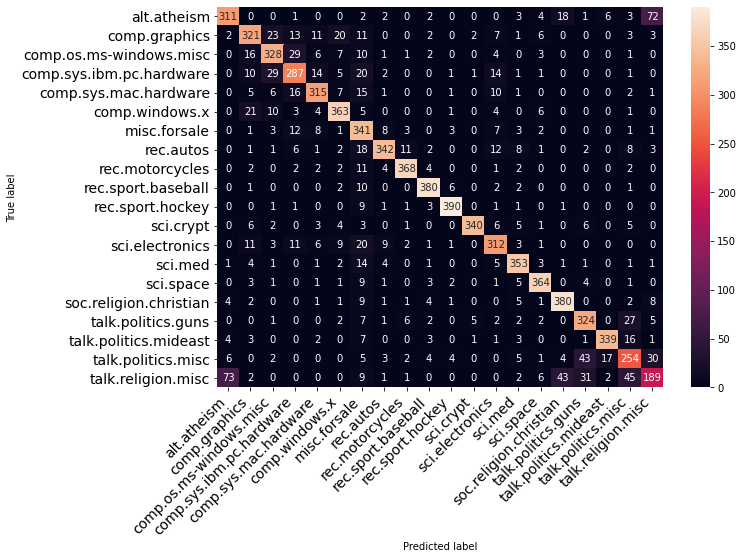

In [22]:
print_confusion_matrix(metrics.confusion_matrix(np.argmax(y_val, axis=1), pred), 
                       class_names)

## Tensorflow

In [0]:
def show_curve(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [0]:
from tensorflow.python.keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from tensorflow.python.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM, GRU, Concatenate, Dropout
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import backend as K

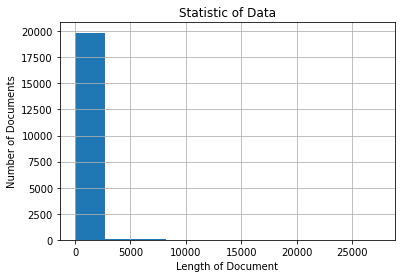

In [25]:
x_train, y_train, x_val, y_val, word_index = data_preprocessing(texts, 
                                                                labels, 
                                                                indices, 
                                                                num_validation_samples, 
                                                                classifier="NeuralNetwork")

In [0]:
def get_embedding_matrix(word_index):
    
    embeddings_index = {}
    with open(os.path.join(GLOVE_DIR, 'glove.6B.{0}d.txt'.format(EMBEDDING_DIM)), encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    
    num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
    embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
    for word, i in word_index.items():
        if i >= MAX_NUM_WORDS:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix, num_words

In [0]:
embedding_matrix, num_words = get_embedding_matrix(word_index)

### CNN

In [28]:
tf.reset_default_graph()
try:
    del model
except:
    pass
K.clear_session()

graph = tf.get_default_graph()
with graph.as_default():
    #Pretrained
    embedding_layer = Embedding(num_words,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False #True when retrain
                               )
    #Train embedding
#     embedding_layer = Embedding(len(word_index) + 1,
#                                 EMBEDDING_DIM,
#                                 input_length=MAX_SEQUENCE_LENGTH)

    print('Training model.')

    # train a 1D convnet with global maxpooling
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    x = Conv1D(128, 5, activation='relu')(embedded_sequences)
    x = MaxPooling1D(5)(x)
    x = Conv1D(128, 5, activation='relu')(x)
    x = MaxPooling1D(5)(x)
    x = Conv1D(128, 5, activation='relu')(x)
    x = MaxPooling1D(5)(x)
    x = Conv1D(128, 5, activation='relu')(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(128, activation='relu')(x)
    preds = Dense(len(labels_index), activation='softmax')(x)

    model = Model(sequence_input, preds)
    model._make_predict_function()
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['acc'])

    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=20, # Change this to at least 20 for final run
                        validation_data=(x_val, y_val))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Training model.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 11999 samples, validate on 7998 samples
11999/11999 [==============================] - 11s 936us/sample - loss: 2.6679 - acc: 0.1337 - val_loss: 2.5631 - val_acc: 0.1672


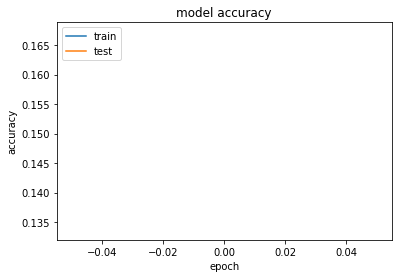

In [29]:
show_curve(history)

In [0]:
pred = model.predict(x_val)
experiment_result['CNN'] = metrics.accuracy_score(np.argmax(y_val, axis=1), np.argmax(pred, axis=1))

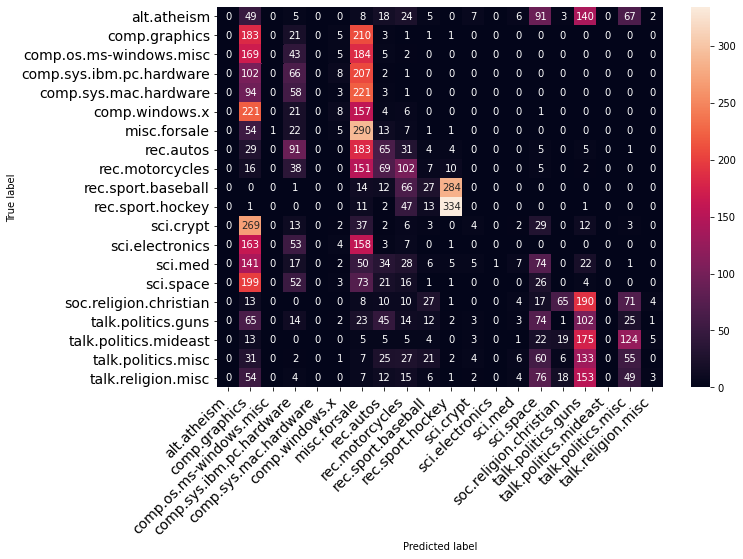

In [31]:
print_confusion_matrix(metrics.confusion_matrix(np.argmax(y_val, axis=1), np.argmax(pred, axis=1)), 
                       class_names)

### LSTM
1. need to run more than 20 epochs to get close to converging
2. Warning: It can take >3 hours!

In [32]:
tf.reset_default_graph()
try:
    del model
except:
    pass
K.clear_session()

with graph.as_default():
    embedding_layer = Embedding(num_words,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False #True when retrain
                               )
    #Train embedding
#    embedding_layer = Embedding(len(word_index) + 1,
#                                 EMBEDDING_DIM,
#                                 input_length=MAX_SEQUENCE_LENGTH)

    print('Training model.')

    # train a single layer LSTM recurrent neural network
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    # Replace LSTM with GRU if you want
    x,_,_ = LSTM(EMBEDDING_DIM, return_state=True)(embedded_sequences)
    x = Dense(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    preds = Dense(len(labels_index), activation='softmax')(x)

    model = Model(sequence_input, preds)
    model._make_predict_function()
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['acc'])
    
    history=model.fit(x_train, y_train,
                      batch_size=128,
                      epochs=20, # Change this to at least 20 for final run
                      validation_data=(x_val, y_val))

Training model.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 11999 samples, validate on 7998 samples
Epoch 1/2
11999/11999 [==============================] - 509s 42ms/sample - loss: 2.7414 - acc: 0.1382 - val_loss: 2.4248 - val_acc: 0.2078
Epoch 2/2
11999/11999 [==============================] - 509s 42ms/sample - loss: 2.3415 - acc: 0.2232 - val_loss: 2.0973 - val_acc: 0.2817


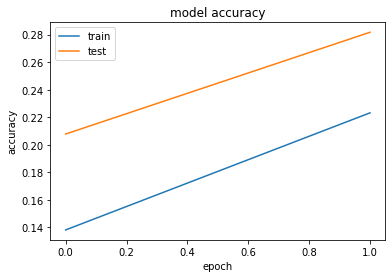

In [33]:
show_curve(history)

In [0]:
with graph.as_default():
    pred = model.predict(x_val)
    experiment_result['RNN'] = metrics.accuracy_score(np.argmax(y_val, axis=1), np.argmax(pred, axis=1))

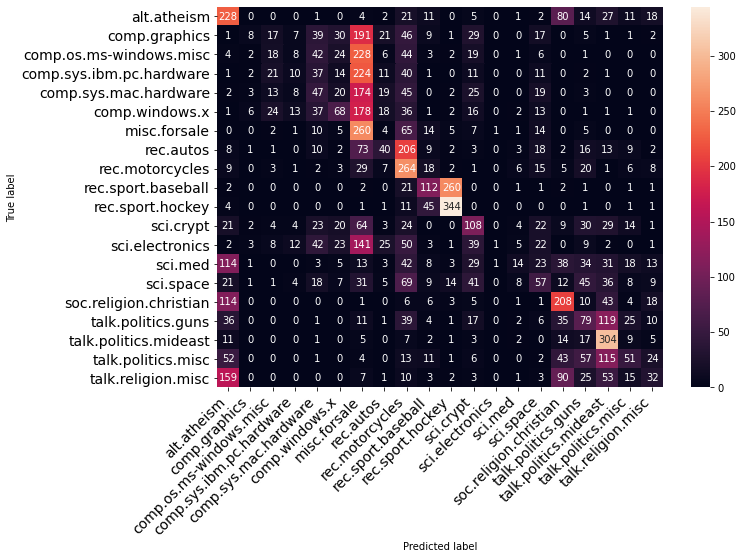

In [35]:
print_confusion_matrix(metrics.confusion_matrix(np.argmax(y_val, axis=1), np.argmax(pred, axis=1)), 
                       class_names)

In [0]:
def show_bar(experiment_result):
    df = pd.DataFrame(columns=['Algorithm','Score'])
    for key, value in experiment_result.items():
        df = df.append({'Algorithm': key, 'Score':value}, ignore_index=True)
    sns.barplot(x=df['Algorithm'], y=df['Score'], ci=None)
    plt.show()

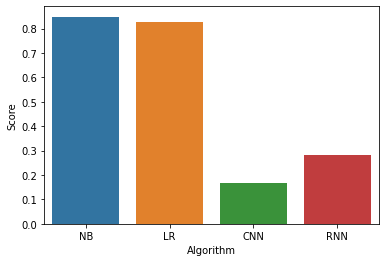

In [37]:
df = show_bar(experiment_result)

### Bidirectional LSTM + LSTM

In [38]:
tf.reset_default_graph()
try:
    del model
except:
    pass
K.clear_session()
with graph.as_default():
    embedding_layer = Embedding(num_words,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False #True when retrain
                               )
    #Train embedding
#     embedding_layer = Embedding(len(word_index) + 1,
#                                 EMBEDDING_DIM,
#                                 input_length=MAX_SEQUENCE_LENGTH)

    print('Training model.')

    # train 2 Layer LSTM model with first LSTM to bidirectional
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    x1 = LSTM(EMBEDDING_DIM, return_sequences=True)(embedded_sequences)
    x2 = LSTM(EMBEDDING_DIM, return_sequences=True, go_backwards=True)(embedded_sequences)
    x = Concatenate()([x1, x2])
    x,_,_ = LSTM(EMBEDDING_DIM, return_state=True)(x) # Note: this layer takes previous LSTM layer as input!
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    preds = Dense(len(labels_index), activation='softmax')(x)

    model = Model(sequence_input, preds)
    model._make_predict_function()
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['acc'])

    history = model.fit(x_train, y_train,
                         batch_size=128,
                         epochs=20, # Change this to at least 20 for final run
                         validation_data=(x_val, y_val))

Training model.
Train on 11999 samples, validate on 7998 samples
11999/11999 [==============================] - 1568s 131ms/sample - loss: 2.7642 - acc: 0.1102 - val_loss: 2.4966 - val_acc: 0.1585


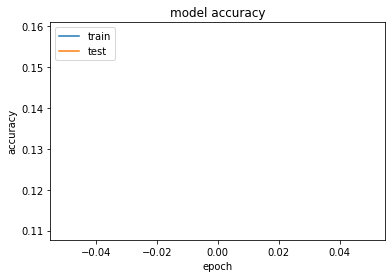

In [39]:
show_curve(history)

In [0]:
with graph.as_default():
    pred = model.predict(x_val)
    experiment_result['BRNN'] = metrics.accuracy_score(np.argmax(y_val, axis=1), np.argmax(pred, axis=1))

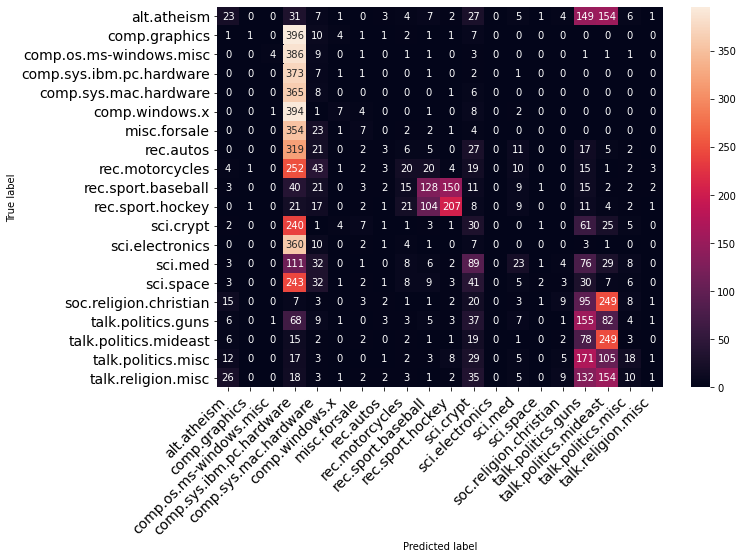

In [41]:
print_confusion_matrix(metrics.confusion_matrix(np.argmax(y_val, axis=1), np.argmax(pred, axis=1)), 
                       class_names)

## Train Simple RNN with Truncated Backprop Through Time (TBPTT)

In [0]:
MAX_SEQUENCE_LENGTH = 100 # Chunk size for TBPTT

In [0]:
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [0]:
def data_preprocessing_v2(texts, labels, word_index, indices, num_validation_samples, classifier="NeuralNetwork"):
    
    word_index = None
    
    new_sequences = []
    new_labels = []
    
    texts = [texts[i] for i in indices]
    labels = [labels[i] for i in indices]
    texts = texts[:-num_validation_samples]
    labels = labels[:-num_validation_samples]
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)
    
    print(len(tokenizer.word_index))
    sequences = tokenizer.texts_to_sequences(texts)

    for index, sequence in enumerate(sequences):
        split_sequence = list(chunks(sequence, 100)) # Break sequences into 100-length chunks for training!
        label = labels[index]
        new_sequences += split_sequence
        new_labels += [label]*len(split_sequence)

    print(len(new_sequences), len(new_labels))

    sequences = new_sequences
    labels = new_labels

    plt.figure()
    plt.hist([len(x) for x in sequences])
    plt.xlabel('Length of Document')
    plt.ylabel('Number of Documents')
    plt.title('Statistic of Data')
    plt.grid(True)
    plt.show()

    word_index = tokenizer.word_index
    data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    
    labels = to_categorical(np.asarray(labels))  
    
    return data, labels    

174074
38329 38329


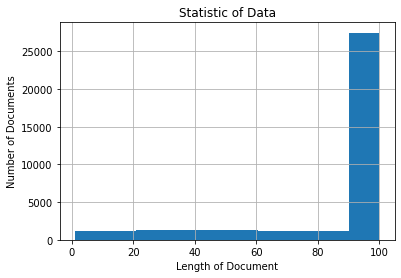

In [45]:
x_train, y_train = data_preprocessing_v2(texts, 
                                         labels,
                                         word_index,
                                         indices,
                                         num_validation_samples)

In [46]:
indices

array([ 1450, 13945,  3069, ..., 18353,  2480,  8479])

In [47]:
x_train.shape

(38329, 100)

In [48]:
tf.reset_default_graph()
try:
    del model
except:
    pass
K.clear_session()

with graph.as_default():
    embedding_layer = Embedding(num_words,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False #True when retrain
                               )
    #Train embedding
#     embedding_layer = Embedding(len(word_index) + 1,
#                                 EMBEDDING_DIM,
#                                 input_length=MAX_SEQUENCE_LENGTH)

    print('Training model.')

    # train a single layer LSTM recurrent neural network
    sequence_input = Input(shape=(None,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    # Replace LSTM with GRU if you want
    x,_,_ = LSTM(EMBEDDING_DIM, return_state=True)(embedded_sequences)
    x = Dense(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    preds = Dense(len(labels_index), activation='softmax')(x)

    model = Model(sequence_input, preds)
    model._make_predict_function()
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['acc'])

    history=model.fit(x_train, y_train,
                      batch_size=128,
                      epochs=20, # Change this to at least 20 for final run
                      validation_data=(x_val, y_val))

Training model.
Train on 38329 samples, validate on 7998 samples
38329/38329 [==============================] - 120s 3ms/sample - loss: 2.0906 - acc: 0.3186 - val_loss: 1.9447 - val_acc: 0.3310


In [0]:
MAX_SEQUENCE_LENGTH = 2500

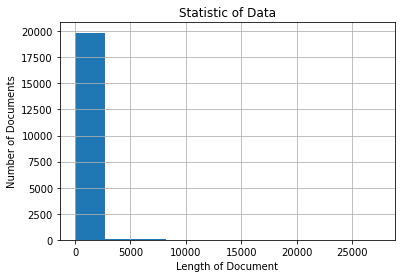

In [50]:
_, _, x_val, y_val, word_index = data_preprocessing(texts, 
                                                                labels,  
                                                                indices,
                                                                num_validation_samples, 
                                                                classifier="NeuralNetwork")

In [0]:
with graph.as_default():
    pred = model.predict(x_val)
    experiment_result['RNN-Short'] = metrics.accuracy_score(np.argmax(y_val, axis=1), np.argmax(pred, axis=1))

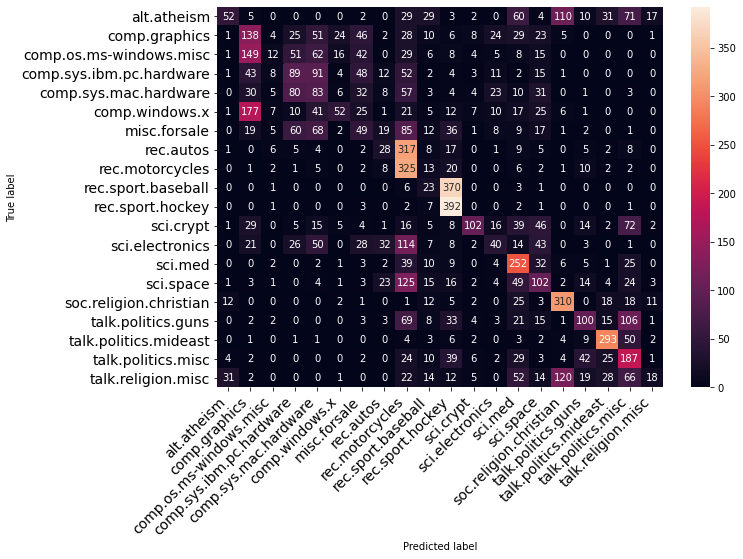

In [52]:
print_confusion_matrix(metrics.confusion_matrix(np.argmax(y_val, axis=1), np.argmax(pred, axis=1)), 
                       class_names)

## Show final results of different architectures on 20 newsgroups

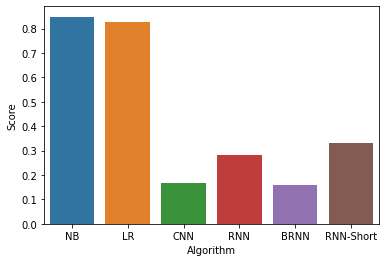

In [53]:
df = show_bar(experiment_result)

# Part B. US Consumer Finance Complaints

### Constants

In [0]:
TEXT_DATA_DIR = consumer_PATH
MAX_SEQUENCE_LENGTH = 500
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.4

### Packages

In [0]:
import pandas as pd
import re
import itertools
import string
from io import BytesIO
from collections import Counter
from time import time
import datetime
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

### Data Preprocessing

In [0]:
def clean_str(string):
    """
    Tokenization/string cleaning (partially modified)
    """
    string = re.sub(r"[^A-Za-z0-9()!?\'\`%$]", " ", string) # keep also %$ but removed comma
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " ( ", string)
    string = re.sub(r"\)", " ) ", string)
    string = re.sub(r"\?", " ? ", string)
    string = re.sub(r"\$", " $ ", string) #yes, isolate $
    string = re.sub(r"\%", " % ", string) #yes, isolate %
    string = re.sub(r"\s{2,}", " ", string)
    
    # fixing XXX and xxx like as word
    string = re.sub(r'\S*(x{2,}|X{2,})\S*',"xxx",string)
    # removing non ascii
    string = re.sub(r'[^\x00-\x7F]+', "", string) 
    
    return string.strip().lower()

In [0]:
def get_complaints(path):
    
    # Read the input dataset 
    d = pd.read_csv(path, 
                    usecols=('product','consumer_complaint_narrative'),
                    dtype={'consumer_complaint_narrative': object})
    # Only interested in data with consumer complaints
    d=d[d['consumer_complaint_narrative'].notnull()]
    d=d[d['product'].notnull()]
    d.reset_index(drop=True,inplace=True)
    d['consumer_complaint_narrative'] = d['consumer_complaint_narrative'].apply(clean_str)
    
    le = preprocessing.LabelEncoder()
    label_name = d['product'].tolist()
    le.fit(label_name)
    d['label'] = le.transform(label_name)
    return d['consumer_complaint_narrative'].tolist(), d['product'].tolist(), d['label'].tolist()

In [58]:
print(TEXT_DATA_DIR)

consumer_complaints.csv


In [59]:
print()

In [60]:
xtexts, labels_index, labels = get_complaints(TEXT_DATA_DIR)

FileNotFoundError: ignored